In [140]:
#!g1.1
from evaluation.run import run
run()

Access Denied: Spec G21 is not available for your cloud. Please contact your administrator or Support

In [ ]:
#!g1.1


In [ ]:
#!g1.1


In [ ]:
#!g1.1


In [ ]:
#!g1.1


In [ ]:
#!g1.1


In [112]:
#!g1.1
from asr.spectogram_augmentations import SpectrogramAugmentatator
from asr.validation_diarization_dataset import KekosParser
from common.dictionary import SentencePieceDict
from common.text_processor import FilterBadTokensTextProcessor
import json

features_config = json.loads(open("asr/configs/features/asr_default_64.json").read())
spec_augmentation_config = {"phone_aug": {
            "prob": 1.0,
            "alpha_from": 0.01,
            "alpha_to": 0.4,
            "height_from": 52,
            "height_to": 63,
            "width_from": 5,
            "width_to": 45,
            "fill_prob": 0.5
        }}
dictionary = SentencePieceDict('sp.model')
wave_augmentator = lambda x: x
spec_augmentator = SpectrogramAugmentatator.from_config(augmentation_config=spec_augmentation_config)
text_processor = FilterBadTokensTextProcessor()

reader = open('data/validation_data/kekos.json', 'r').readlines()[239:50000:100]
for i in range(len(reader)):
    reader[i] = json.loads(reader[i].rstrip())
parser = KekosParser(dictionary, wave_augmentator, spec_augmentator, features_config, text_processor)

In [113]:
#!g1.1
import IPython.display as ipd
audio, texts = parser.parse_audios(reader[6])
print(texts)
ipd.Audio(audio, rate=16000)

['А ХОРОШО ХОРОШО', 'ДА ТЫ НА ВТОРОЙ ЛИНИИ СЕЙЧАС Я ЛИБО ВЫ МЕНЯ СОЕДИНИТЕ ЛИБО Я ПОДОЖДУ ЗВОНКА КАК ЛУЧШЕ']


/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:828: UserWarning: The following variables cannot be serialized: parser
  warnings.warn(message)


In [114]:
#!g1.1
from asr.features_extractor import FeatureExtractorFactory
features_extractor = FeatureExtractorFactory.create("example", features_config, wave_augmentator, spec_augmentator)
record = {'sample_rate': 16000, 'data': audio}
parsed_record = features_extractor.extract(record)

/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:828: UserWarning: The following variables cannot be serialized: parser
  warnings.warn(message)


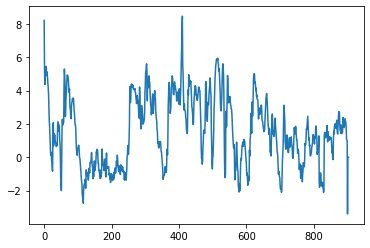

In [115]:
#!g1.1
import matplotlib.pyplot as plt
plt.plot(parsed_record.mean(axis=1))

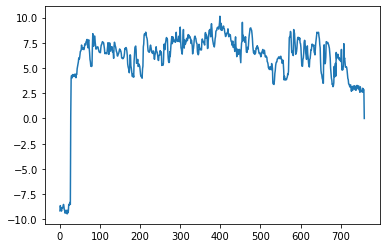

/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:828: UserWarning: The following variables cannot be serialized: parser, yt_parser
  warnings.warn(message)


In [101]:
#!g1.1
from asr.diarization_dataset import YtSampleParser
from common.diarization_utils import YtReader
from common.disk_utils import LatinPolicy
import numpy as np

yt_reader = YtReader('data/yt_data/parsed_records_phone_acoustic.json',
                     start_position=np.random.randint(100000), end_position=200000)
it = iter(yt_reader)
yt_parser = YtSampleParser(dictionary, wave_augmentator, spec_augmentator, features_config,
                           data_type='yt-raw', latin_policy=LatinPolicy.AsIs, text_processor=text_processor,
                           max_speakers_num=2, speakers_num_frequency=[0.0, 1.0], constant_gap=None)
yt_rows = [next(it), next(it)]
audio, texts = yt_parser.parse_audios(yt_rows)
record = {'sample_rate': 16000, 'data': audio}
parsed_record = features_extractor.extract(record)

plt.plot(parsed_record.mean(axis=1))

In [ ]:
#!g1.1
